# Mariyam Sheikh - Student Performance Analyzer using Linear Regression

In [457]:
#I have used Linear Regression to find the correlation between the number of hours students study and the scores they secure.
#Before applying the linear regression model, I got rid of the outlinears in the given dataset to minimize the MSE

In [458]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import scipy.integrate
import scipy.optimize
import math
from sklearn.metrics import r2_score
from scipy import stats

In [459]:
dataframe = pd.read_csv('student_scores.csv')

In [460]:
dataframe

,Hours,Scores
0,2.3,18
1,5.0,45
2,3.2,25
3,8.5,72
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [461]:
dataframe = dataframe.dropna()
dataframe = dataframe.drop_duplicates()

In [462]:
dataframe.describe()

,Hours,Scores
count,25.000000,25.000000
mean,4.980000,50.800000
std,2.512635,25.189283
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,45.000000
75%,7.400000,70.000000
max,9.200000,95.000000


In [463]:
dataframe.shape

(25, 2)

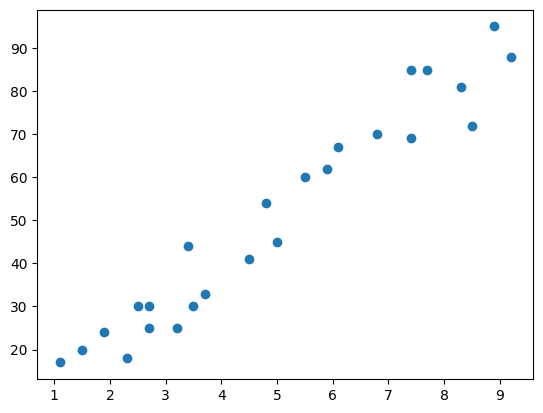

In [464]:
X = dataframe['Hours'].values.reshape(-1,1)
Y = dataframe['Scores'].values.reshape(-1,1)
plt.plot(X,Y,'o')
plt.show()

# Eliminating the outliners from the dataset using zscore to minimize MSE

In [465]:
#Finding outliners in the 'Hours' column
np.abs(stats.zscore(dataframe['Hours']))

0     1.088604
1     0.008124
2     0.723028
3     1.429808
4     0.601169
5     1.413560
6     1.714145
7     0.211222
8     1.348569
9     0.926126
10    1.104852
11    0.373700
12    0.194974
13    0.641789
14    1.576038
15    1.592286
16    1.007365
17    1.251082
18    0.454939
19    0.982993
20    0.926126
21    0.073115
22    0.519930
23    0.739276
24    0.982993
Name: Hours, dtype: float64

In [466]:
#Finding the positions of the outliners
z = np.abs(stats.zscore(dataframe['Hours']))
threshold = 1.4
outliners = z > 1.4
print(np.where(z > 1.4))

(array([ 3,  5,  6, 14, 15], dtype=int64),)


In [467]:
dataframe = dataframe.drop(3)
dataframe = dataframe.drop(5)
dataframe = dataframe.drop(6)
dataframe = dataframe.drop(14)
dataframe = dataframe.drop(15)
#dataframe = dataframe['Hours'].drop(3)

In [468]:
dataframe.shape

(20, 2)

In [469]:
Xtrain = X[0:18]
Ytrain = Y[0:18]
Xtest = X[17:]
Ytest = Y[17:]

In [470]:
model = LinearRegression()
model.fit(Xtrain,Ytrain)

LinearRegression()

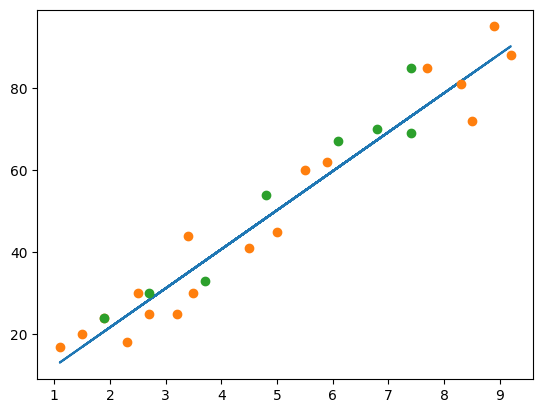

In [471]:
regression_line = model.predict(X)
plt.plot(X,regression_line)
plt.plot(Xtrain,Ytrain,'o')
plt.plot(Xtest,Ytest,'o')
plt.show()

In [472]:
model.predict(X)[8]

array([81.61113339])

In [473]:
YPredictions=model.predict(Xtest)

In [474]:
mean_squared_error(Ytest,YPredictions)

34.45299711886483

In [475]:
MSE = mean_squared_error(Ytest,YPredictions)

In [476]:
print('Root Mean Squared Error = RMSE = ',math.sqrt(MSE))

Root Mean Squared Error = RMSE =  5.869667547558791


In [477]:
print('Coefficient of Determination = R2_Score = ',r2_score(Ytest, YPredictions))

Coefficient of Determination = R2_Score =  0.9218752899798983
